#   Принятие решений в бизнесе. А/В-тестирование. 

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

#  Цель исследования:

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 


# Исходные данные:

*Данные для первой части* 

Файл /datasets/hyp.csv
 
- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

*Данные для второй части*

Файл /datasets/ord.csv
- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.

Файл /datasets/vis.csv.

- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

Данное исследование разделим на несколько частей. 

*[Часть 1.Приоритизация гипотез](#1)*
* [1. Изучение общей информации, предобработка данных. ](#1.1)
* [2. Применение фреймворка ICE для приоритизации гипотез. ](#1.2)
* [3. Применение фреймворка RICE для приоритизации гипотез. ](#1.3)


*[Часть 2. Анализ A/B-теста:](#2)*
* [1. Анализ кумулятивных метрик ](#2.1)
* [2. Анализ выбросов и всплесков. ](#2.2)
* [3. Статистическая значимость. ](#2.3)


*[Часть 3. Общий вывод по А/В-тесту.](#3)* 

<a id='1'></a>
### Приоритизация гипотез:

<a id='1.1'></a>
#### Изучение общей информации, предобработка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math as mth
import numpy as np
import scipy.stats as stats

In [2]:
# изучим файл с гипотезами и  оценками параметров ICE
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('/datasets/hyp.csv', sep=',')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Всего у нас 9 записей. В данных нет пропусков, как и проблем с типом данных. Приведем в порядок названия столбцов.

In [4]:
#названия столбцов приведем к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

<a id='1.2'></a>
#### Применение фреймворка ICE для приоритизации гипотез.

In [5]:
#посчитаем ICE для гипотез,добавим полученные значения ICE к существующей таблице. Новый столбец назовем ICE
data['ICE']=(data['impact']*data['confidence'])/data['efforts']

In [6]:
#выведем столбцы 'hypothesis' и 'ICE', отсортированные по столбцу 'ICE'.
data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Вывод: наиболее перспективные гипотезы по ICE: 
- 1-Запустить акцию, дающую скидку на товар в день рождения	
- 2-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 3-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 4-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

<a id='1.3'></a>
#### Применение фреймворка RICE для приоритизации гипотез.

In [7]:
#посчитаем RICE для гипотез,добавим полученные значения ICE к существующей таблице. Новый столбец назовем RICE
data['RICE']=(data['reach']*data['impact']*data['confidence'])/data['efforts']

In [8]:
#выведем столбцы 'hypothesis' и 'ICE', отсортированные по столбцу 'ICE'.
data[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод: наиболее перспективные гипотезы по ICE: 
- 1-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 3-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
- 4-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Общий вывод:  при применении RICE вместо ICE  на первом  месте теперь гипотеза "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", вместо "запустить акцию, дающую скидку на товар в день рождения". Это связано с тем, что параметр Reach у этой гипотезы 10, а у других гипотез он меньше. Это показывает, как один показатель, может изменить приоритет гипотез.

Согласно обоим методам, можно выделить две лидирующие гипотезы: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок','Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'.

<a id='2'></a>
### Анализ A/B-теста:

<a id='2.1'></a>
#### Анализ кумулятивных метрик.


Изучим данные из файлов с заказами и посетителями. 

In [9]:
# прочтём данные из файлов с результатами A/B-тестирования
orders = pd.read_csv('/datasets/ord.csv', sep=',')
orders.sample(10)

,transactionId,visitorId,date,revenue,group
1021,969750843,4120364173,2019-08-31,15500,B
234,699854005,3391919803,2019-08-23,2320,B
680,2083889130,4176813035,2019-08-20,1680,B
965,271768864,2440451175,2019-08-10,5900,A
985,2689922045,3020644940,2019-08-10,5430,A
886,51443164,4278982564,2019-08-05,24744,A
72,477940151,1422773200,2019-08-01,700,A
1117,3003595335,1810540789,2019-08-13,11565,B
367,1033377712,3860669668,2019-08-19,3990,B
283,3641100475,1579036099,2019-08-18,1100,B


In [10]:
visitors = pd.read_csv('/datasets/vis.csv', sep=',')
visitors.sample(10)

,date,group,visitors
27,2019-08-28,A,594
48,2019-08-18,B,737
44,2019-08-14,B,746
22,2019-08-23,A,468
52,2019-08-22,B,650
37,2019-08-07,B,709
17,2019-08-18,A,668
42,2019-08-12,B,543
24,2019-08-25,A,621
46,2019-08-16,B,413


In [11]:
#выведем общую информацию по заказам
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
#выведем общую информацию по посетителям
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
# преобразование даты 
orders['date'] = pd.to_datetime(orders['date']). dt.date
visitors['date'] = pd.to_datetime(visitors['date']). dt.date

In [14]:
# проверим на наличие явных дубликатов
orders.duplicated().sum()

0

In [15]:
# проверим на наличие явных дубликатов
visitors.duplicated().sum()

0

In [16]:
# посмотрим сколько у нас групп в А/В-тесте и количество пользователей  в каждой группе по таблице с заказами.
print(orders.groupby('group')['visitorId'].count())

group
A    557
B    640
Name: visitorId, dtype: int64


In [45]:
#посмотрим не попадают ли какие-то пользователи в обе группы - по таблице с заказами.
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

Пересечения в группах есть,причиной может быть сбой в системе или какие-то внешние факторы, оставим как есть.

In [18]:
# узнаем дату начала и окончания теста
print('Начало теста: ',orders['date'].min(),'  Конец теста: ',orders['date'].max())

Начало теста:  2019-08-01   Конец теста:  2019-08-31


Вывод: мы изучили данные,пропусков и явных дубликатов не обнаружили, у столбцов с датами изменили тип данных. Узнали что в тесте 2 группы - "А" и "В", изучили временной интервал,тест проводился в течении месяца. Данные к работе готовы.

Построим график кумулятивной выручки по группам.Для этого нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 
date — дата;
group — группа A/B-теста (A или B);
orders — кумулятивное количество заказов на указанную дату в указанной группе;
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [19]:
# создаем массив уникальных пар значений дат и групп теста,избавимся от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
# агрегируем данные о заказах и вычислим максимальную дату
ordersAggregated=datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [21]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов: 

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated =datesGroups.apply(lambda x:orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
 visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


In [23]:
# прверим совпадают ли даты начала и конца теста в исходных данных и в cumulativeData
print('Начало теста: ',cumulativeData['date'].min(),'  Конец теста: ',cumulativeData['date'].max())

Начало теста:  2019-08-01   Конец теста:  2019-08-31


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

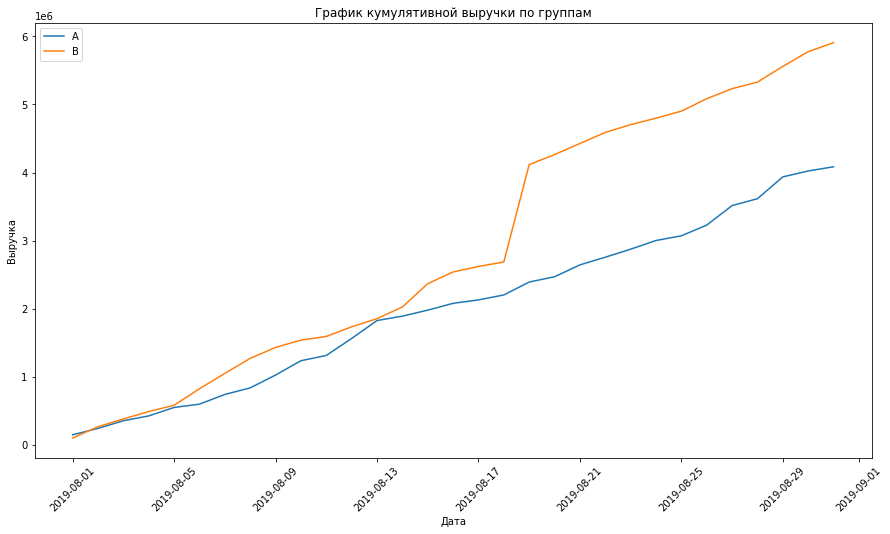

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А и группы B
plt.figure(figsize = (15,8));
plt.title('График кумулятивной выручки по группам');
plt.xlabel('Дата');
plt.ylabel('Выручка');

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45);
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Сегмент В вырвался вперед и продолжил лидировать до конца теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Построим **графики среднего чека по группам** — разделим кумулятивную выручку на кумулятивное число заказов:


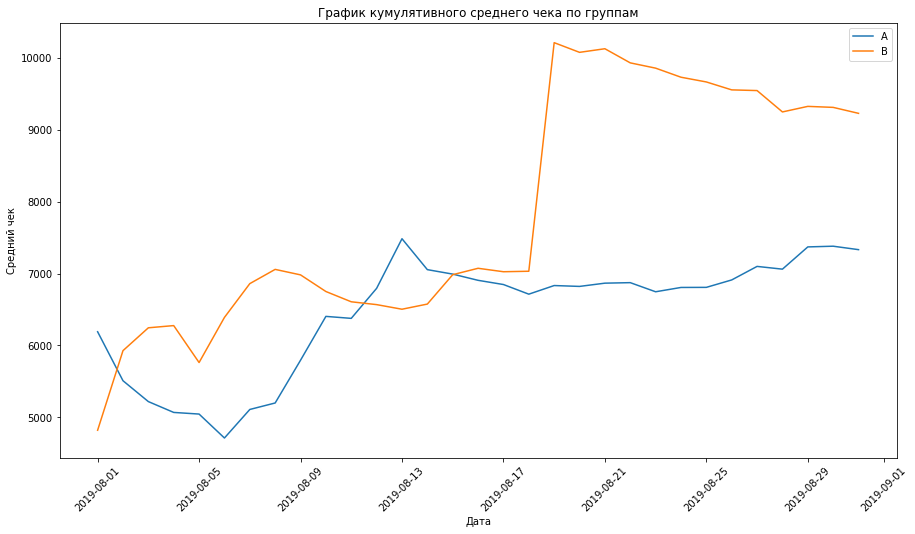

In [25]:
plt.figure(figsize = (15,8));
plt.title('График кумулятивного среднего чека по группам');
plt.xlabel('Дата');
plt.ylabel('Средний чек');
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45);
plt.legend();

Средний чек тоже становится равномерным ближе к концу теста. Резкие всплески в группе В,возможно, в группу B во второй половине теста попали крупные заказы. 

Построим **график относительного изменения кумулятивного среднего чека группы B к группе A**. 

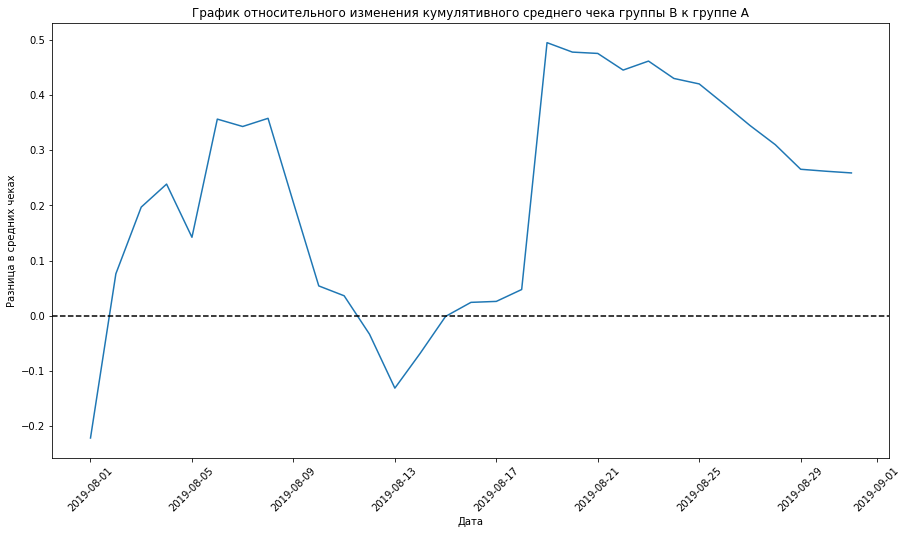

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',\
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize = (15,8));
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');
plt.xlabel('Дата');
plt.ylabel('Разница в средних чеках');
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.xticks(rotation=45);


Результаты теста резко и значительно менялись в несколько дат.Видимо там спрятались крупные заказы и выбросы.

Построим **график кумулятивного среднего количества заказов на посетителя по группам**.

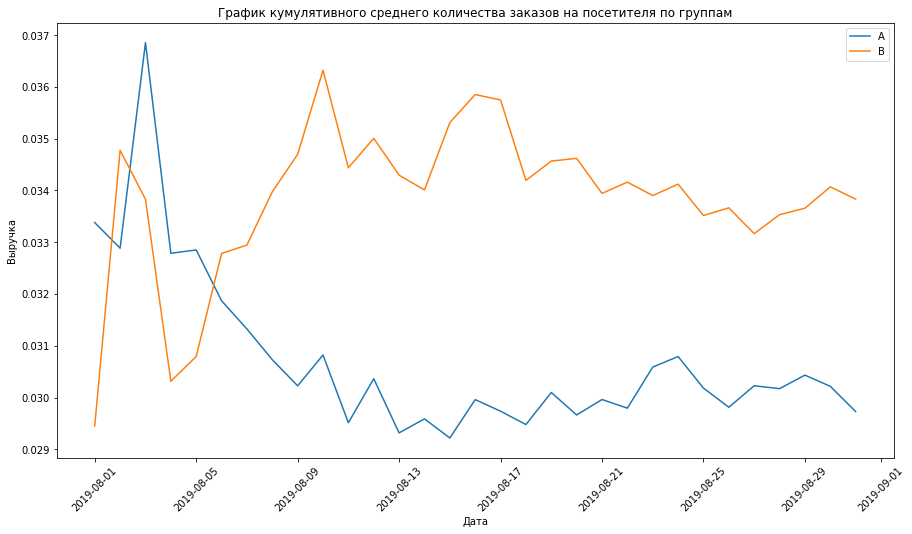

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize = (15,8));
plt.title('График кумулятивного среднего количества заказов на посетителя по группам');
plt.xlabel('Дата');
plt.ylabel('Выручка');
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();
plt.xticks(rotation=45);


По графику конверсия группы B почти в начале теста вырвалась вперед и зафиксировалась.

Построим **график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**. 

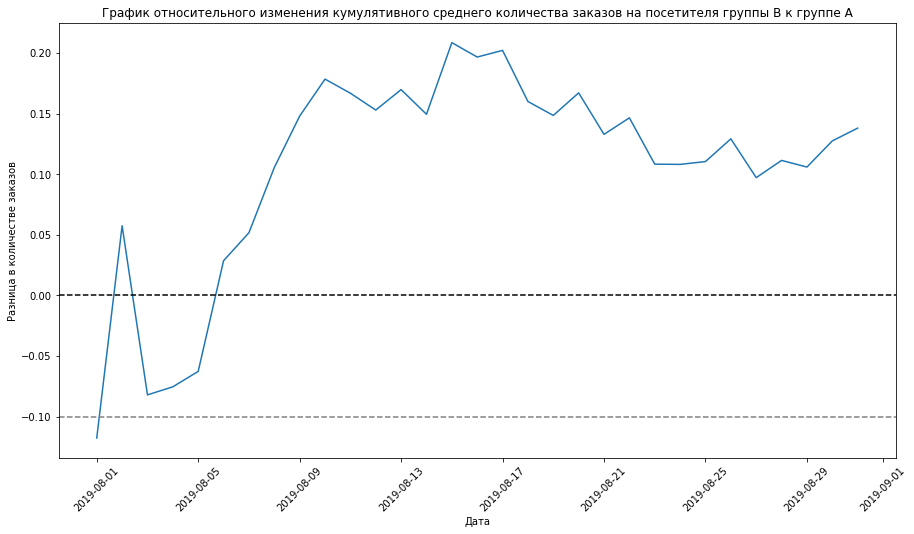

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (15,8));
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A');
plt.xlabel('Дата');
plt.ylabel('Разница в количестве заказов');
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1);

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=45);

Почти с самого начала группа B лидирует по конверсии и имеет тенденцию к улучшению.

<a id='2.2'></a>
#### Анализ выбросов и всплесков.


Построим точечный график количества заказов по пользователям. Для этого сначала подсчитаем количество заказов по пользователям и посмотрим на результат.

In [29]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.

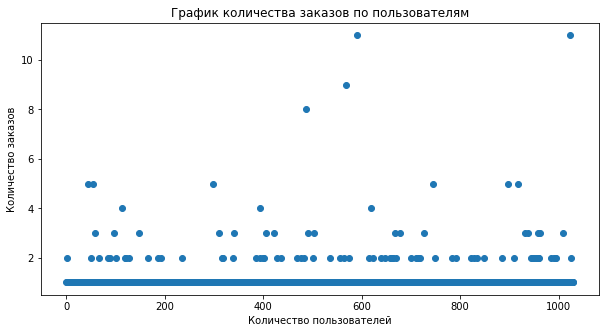

In [30]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize = (10,5));
plt.title('График количества заказов по пользователям');
plt.xlabel('Количество пользователей');
plt.ylabel('Количество заказов');
plt.scatter(x_values, ordersByUsers['orders']);

Пользователей заказавших более двух раз, совсем мало. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. 
Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

Построим точечный график стоимостей заказов. 

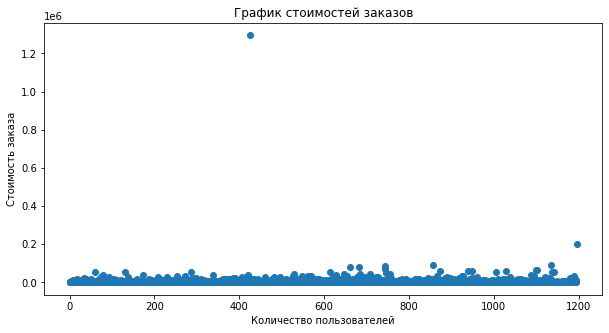

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (10,5));
plt.title('График стоимостей заказов');
plt.xlabel('Количество пользователей');
plt.ylabel('Стоимость заказа');
plt.scatter(x_values, orders['revenue']);

На этом графике мы видим только 2 аномальных заказа. 

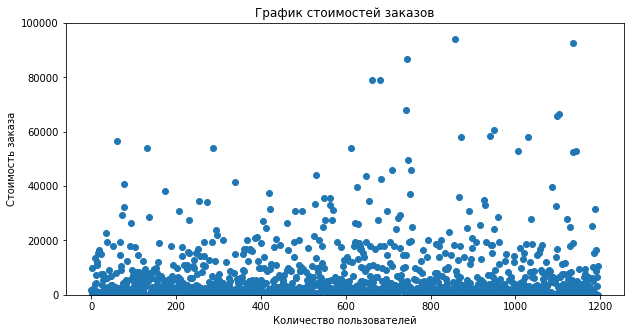

In [33]:
# добавим еще один график, ограничив значения по оси Y
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize = (10,5));
plt.title('График стоимостей заказов');
plt.xlabel('Количество пользователей');
plt.ylabel('Стоимость заказа');
plt.scatter(x_values, orders['revenue']);
plt.ylim(0,100000);

По графику видно, что сумма большинства заказов меньше 20000-25000 рублей. Рассчитаем 95 и 99 перцентиль стоимости заказов, чтобы сделать выводы.

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 233 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и  1%  пользователей с дорогими заказами. 

<a id='2.3'></a>
#### Статистическая значимость.


Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.Сформулируем гипотезы. **Нулевая**: различий в среднем количестве заказов между группами нет. **Альтернативная**: различия в среднем между группами есть.

Подготовим данные.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

Теперь можем посчитать статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() \
 - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
 - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост среднего числа заказов группы B,  округлим до трёх знаков после запятой.

In [38]:
print('p_value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем числе заказов:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p_value: 0.017
Относительное различие в среднем числе заказов: 0.138


Вывод: Анализ "сырых данных" сообщает,что в среднем количестве заказов между группами есть статистически значимые различия. 
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 
Относительный выигрыш группы B равен 13.8%. 

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. **Нулевая гипотеза**: различий в среднем чеке между группами нет. **Альтернативная гипотеза**: различия в среднем чеке между группами есть. 
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами:

In [39]:
print('p_value:','{0:.3f}'
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке:','{0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value: 0.729
Относительное различие в среднем чеке: 0.259


P-value значительно больше 0.05 мы не можем отвергнуть нулевую гипотезу, в среднем чеке нет различий.  При этом средний чек группы B значительно выше среднего чека группы A. Поскольку относительное различие среднего чека между сегментами составляет 25,9%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

До этого мы нашли  95-й и 99-й перцентили средних чеков, они равны 28000 и 58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ordersByUsers['orders']. quantile (.99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > ordersByUsers['orders']. quantile (.99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders['revenue']. quantile (.99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


Всего 15 аномальных пользователей.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.Сформулируем гипотезы. **Нулевая**: различий в среднем количестве заказов между группами нет. **Альтернативная**: различия в среднем между группами есть. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [42]:
print('p_value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем числе заказов:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value: 0.014
Относительное различие в среднем числе заказов: 0.153


Результаты по среднему количеству заказов не изменились,p-value = 0.014 меньше 0.05  Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.Относительный выигрыш группы B равен 15,3%. 

Посмотрим изменились ли результаты по среднему чеку?**Нулевая гипотеза**: различий в среднем чеке между группами нет. **Альтернативная гипотеза**: различия в среднем чеке между группами есть. 

In [44]:
print('p_value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем чеке:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value: 0.851
Относительное различие в среднем чеке: -0.006


P-value увеличился 0,851 > 0.05, не получилось отвергнуть нулевую гипотезу,статистически значимых различий в среднем чеке между группами нет. Но средний чек группы B стал ниже среднего чека группы A на 0,6%.

<a id='3'></a>
### Общий вывод по А/В-тесту.



**Итоги**:
- Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий разница между сегментами сократилась.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть тенденция к улучшению.
- График различия среднего чека колеблется. Сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. При имеющихся данных сегмент B  лучше сегмента A. 